In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import pickle                


In [2]:
path = '../R_script/WGCNA/'
res = []
id2tissue = []
for t in os.listdir(path):
    try:
        dfm = pd.read_csv('../R_script/WGCNA/%s/merged_gene_module.csv' % t, header = None)
    except:
        continue    
    tmp = Counter(dfm[1][dfm[1] != 'grey']).values()
    res.append(tmp)
    id2tissue.append(t)

/home/hclee/my_env/local/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


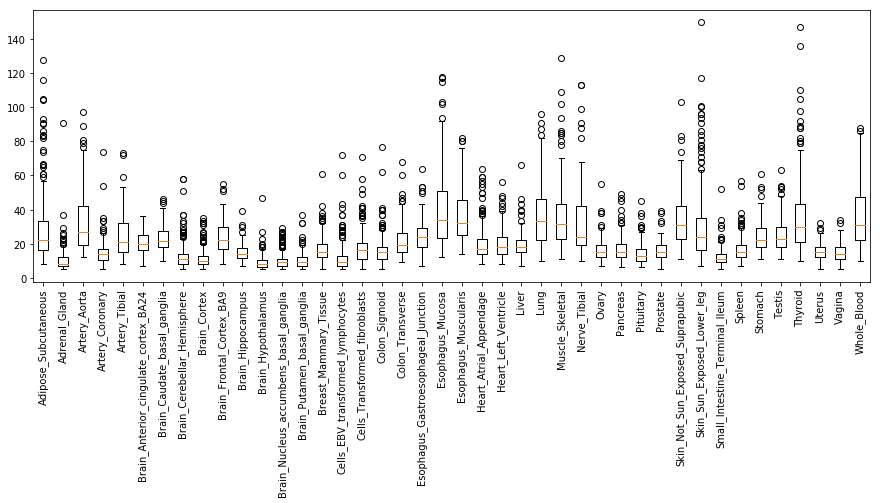

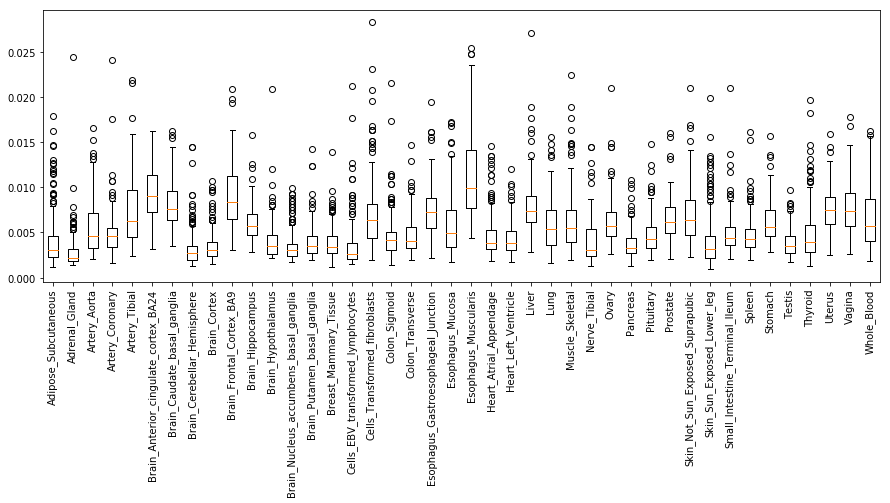

In [3]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure(figsize = (15, 5))
plt.boxplot(res)
plt.xticks([i + 1 for i in range(len(id2tissue))], id2tissue, rotation = 90)
plt.show()

fig = plt.figure(figsize = (15, 5))
plt.boxplot([np.array(v, dtype = 'float') / np.sum(v) for v in res])
plt.xticks([i + 1 for i in range(len(id2tissue))], id2tissue, rotation = 90)
plt.show()

In [20]:
t = id2tissue[4]
dfm = pd.read_csv('../R_script/WGCNA/%s/gene_module.csv' % t, header = None)

In [21]:
Counter(dfm[1]).most_common()

[('grey', 3621),
 ('turquoise', 73),
 ('blue', 72),
 ('brown', 59),
 ('yellow', 53),
 ('green', 53),
 ('black', 46),
 ('red', 46),
 ('pink', 45),
 ('purple', 44),
 ('greenyellow', 44),
 ('magenta', 44),
 ('tan', 44),
 ('cyan', 41),
 ('salmon', 41),
 ('midnightblue', 40),
 ('grey60', 39),
 ('lightcyan', 39),
 ('royalblue', 38),
 ('lightgreen', 38),
 ('lightyellow', 38),
 ('darkturquoise', 37),
 ('darkgreen', 37),
 ('darkred', 37),
 ('darkgrey', 37),
 ('orange', 36),
 ('darkorange', 36),
 ('skyblue', 35),
 ('white', 35),
 ('saddlebrown', 35),
 ('darkolivegreen', 34),
 ('violet', 34),
 ('steelblue', 34),
 ('paleturquoise', 34),
 ('darkmagenta', 33),
 ('plum1', 32),
 ('yellowgreen', 32),
 ('skyblue3', 32),
 ('sienna3', 32),
 ('orangered4', 31),
 ('lightsteelblue1', 30),
 ('lightcyan1', 30),
 ('mediumpurple3', 30),
 ('ivory', 29),
 ('bisque4', 28),
 ('floralwhite', 28),
 ('darkorange2', 28),
 ('brown4', 28),
 ('plum2', 27),
 ('darkslateblue', 27),
 ('thistle2', 27),
 ('thistle1', 27),
 ('sa

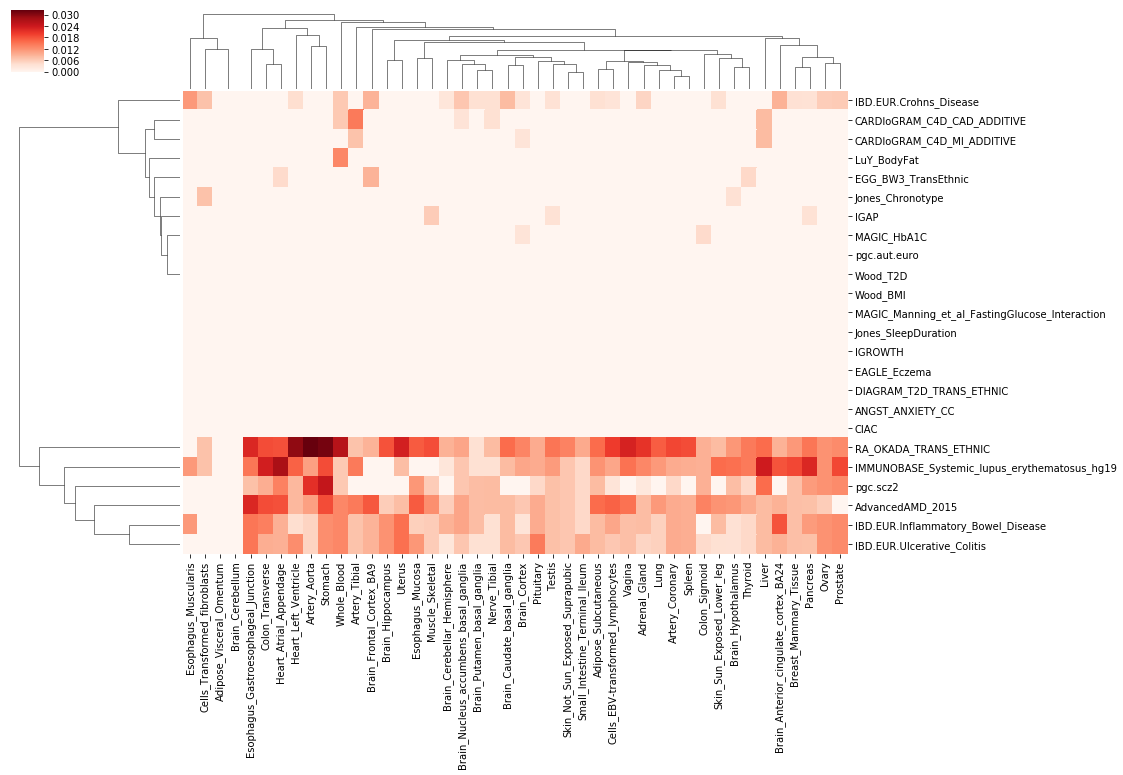

In [21]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.clustermap(pd.DataFrame(count_mat, index=id2ph, columns = id2tissue), cmap = 'Reds', figsize = (15, 10))
plt.show()

In [33]:
t0 = id2tissue[25]
fea_mat = np.zeros((len(id2ph), len(res_all[(p, t0)])))

for (p, t), item in res_all.items():
    if t != t0:
        continue
        
    fea_mat[ph2id[p], :] = np.array(item)


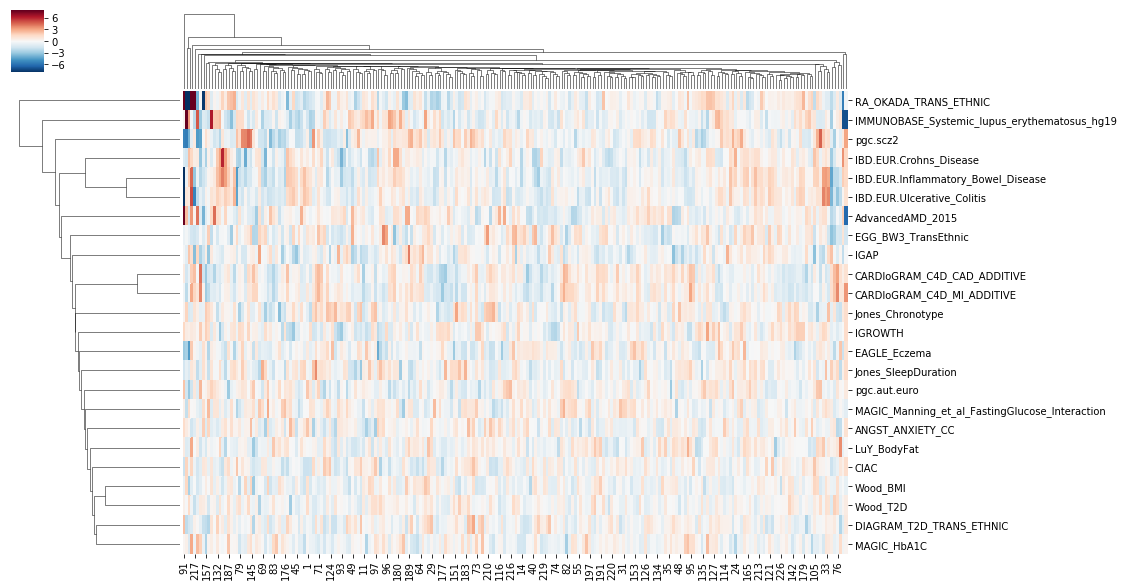

In [34]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.clustermap(pd.DataFrame(fea_mat, index=id2ph), cmap = 'RdBu_r', figsize = (15, 10), vmax = 8.0, vmin = -8.)
plt.show()

In [ ]:

with open('ensembl2genename.p', 'rb') as reader:
    gid2gn = pickle.load(reader)


for c, _ in Counter(dfm[1]).most_common(10):
    print c
    
    for i in np.where(dfm[1] == c)[0]:
        g = dfm[0].iloc[i]
        print gid2gn[g]
    print

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(res_ratio, bins = 20)
plt.show()

In [ ]:
import seaborn.apionly as sns

sns.clustermap(eigen_genes, cmap = 'RdBu_r', figsize = (15, 15), metric='correlation', vmax = 8.0, vmin = -8.0)
plt.show()

In [ ]:
res_all = [res_all[ph] for ph in id2ph]

In [ ]:
res_all = np.array(res_all)

In [ ]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.clustermap(res_all, cmap = 'RdBu_r', vmax = 10., vmin = -10.0)
plt.show()

In [ ]:
np.sum(np.abs(res_all) > 5.0)

In [ ]:
len(id2ph)

In [ ]:
np.sum(np.abs(res_all) > 5.0, axis = 1)

In [ ]:
np.sum(np.abs(res_all) > 5.0, axis = 0)